# Project 3 - Customer clustering
# Amirali Shahriary

In [77]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN


In [2]:
# Load the data from the CSV file
data = pd.read_csv('/home/amirali/Downloads/Customer.csv') 
#data = pd.read_csv('Customer.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
data.shape

(200, 5)

<AxesSubplot:>

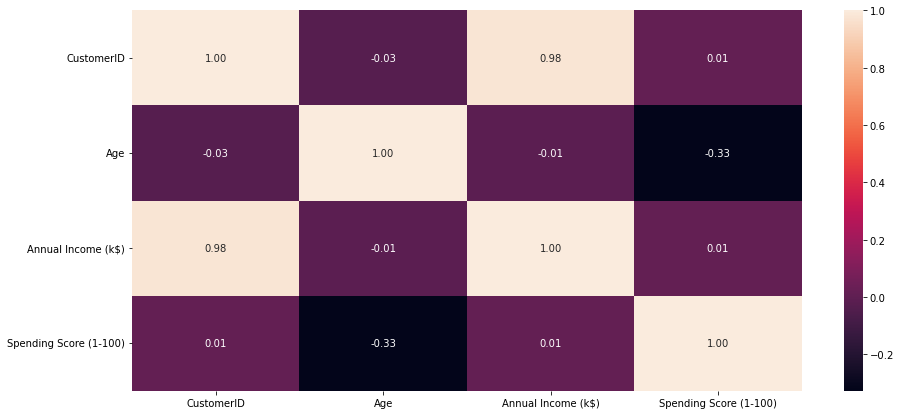

In [9]:
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data.corr(), annot = True, fmt= '.2f')

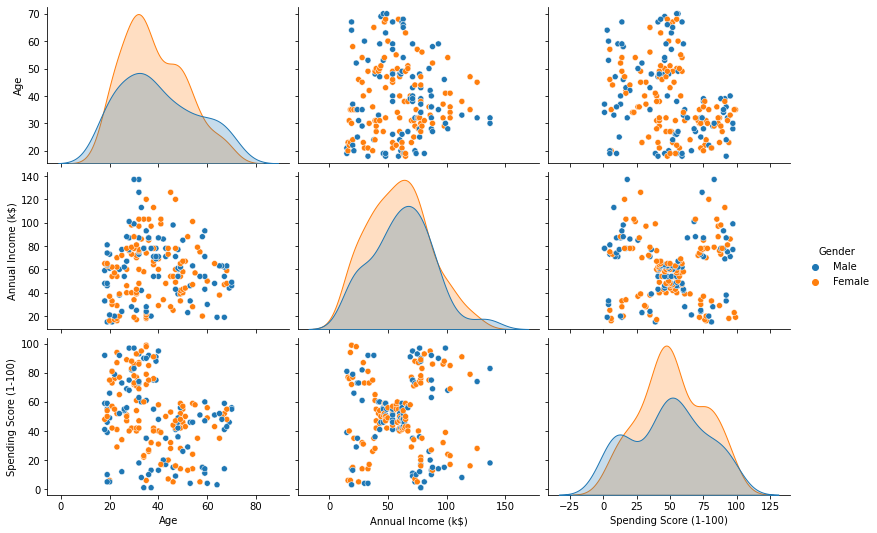

In [14]:
sns.pairplot(data=data, vars=data.drop(['CustomerID', 'Gender'], axis=1).columns, hue='Gender', aspect=1.5)
plt.show()


# K means:

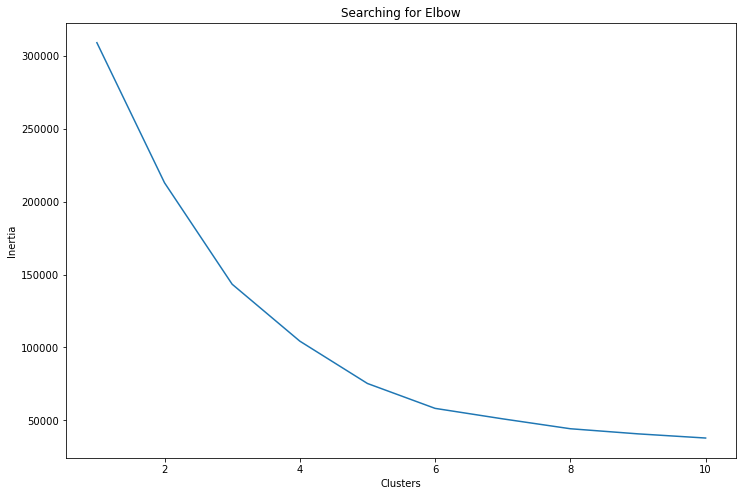

In [16]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

Elbow graph shows 5 cluster is optimum we know this method tells us to select the cluster when there is a significant change in inertia (Elbow). As we can see from the graph,there are some points that are more likely to be a elbow.

**Now due it seems that there are 5 cluster optimum so we put K=5 and see the dedicated plot.**

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


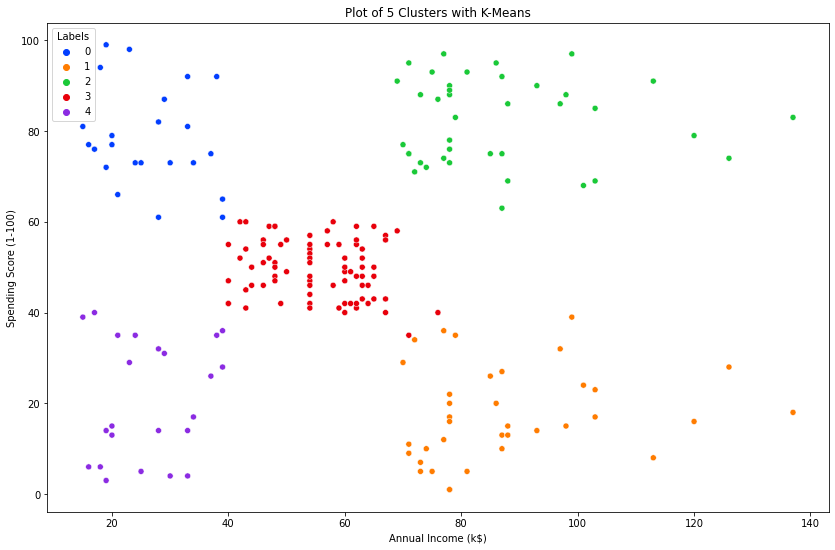

In [18]:
k = 5
clusters = KMeans(n_clusters = k).fit(X)
X['Labels'] = clusters.labels_
plt.figure(figsize=(14, 9))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', 5))
plt.title('Plot of 5 Clusters with K-Means')
plt.show()

We can analyze our 5 clusters in detail now:

1) Label 0 (blue)   : Those who have low annual income but high spending score

2) Label 1 (orange) : Those who have high annual income but low spending score

3) Label 2 (green)  : Those who have high annual income and high spending score

4) Label 3 (red)    : Those who have mid-level annual income and mid-level spending score

5) Label 4 (purple) : Those who have low annual income and low spending score


# Hierarchical :

We have two ways for hierarchical clustering : 1- agglomerative 2- divisive , in this project we use agglomerative way to model the problem.

In [53]:
dist = distance_matrix(X, X)
print(dist)
Z = hierarchy.linkage(dist, 'complete') # we can also use average linkage !

[[  0.          85.13518662  39.66106403 ... 100.28958072  63.35613625
   86.0581199 ]
 [ 85.13518662   0.          66.85057965 ...  74.6860094   81.62107571
  113.97368117]
 [ 39.66106403  66.85057965   0.         ...  62.93647591  32.54228019
   57.69748695]
 ...
 [100.28958072  74.6860094   62.93647591 ...   0.          66.9178601
   70.73895674]
 [ 63.35613625  81.62107571  32.54228019 ...  66.9178601    0.
   39.92492956]
 [ 86.0581199  113.97368117  57.69748695 ...  70.73895674  39.92492956
    0.        ]]


/tmp/ipykernel_4120/458555609.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


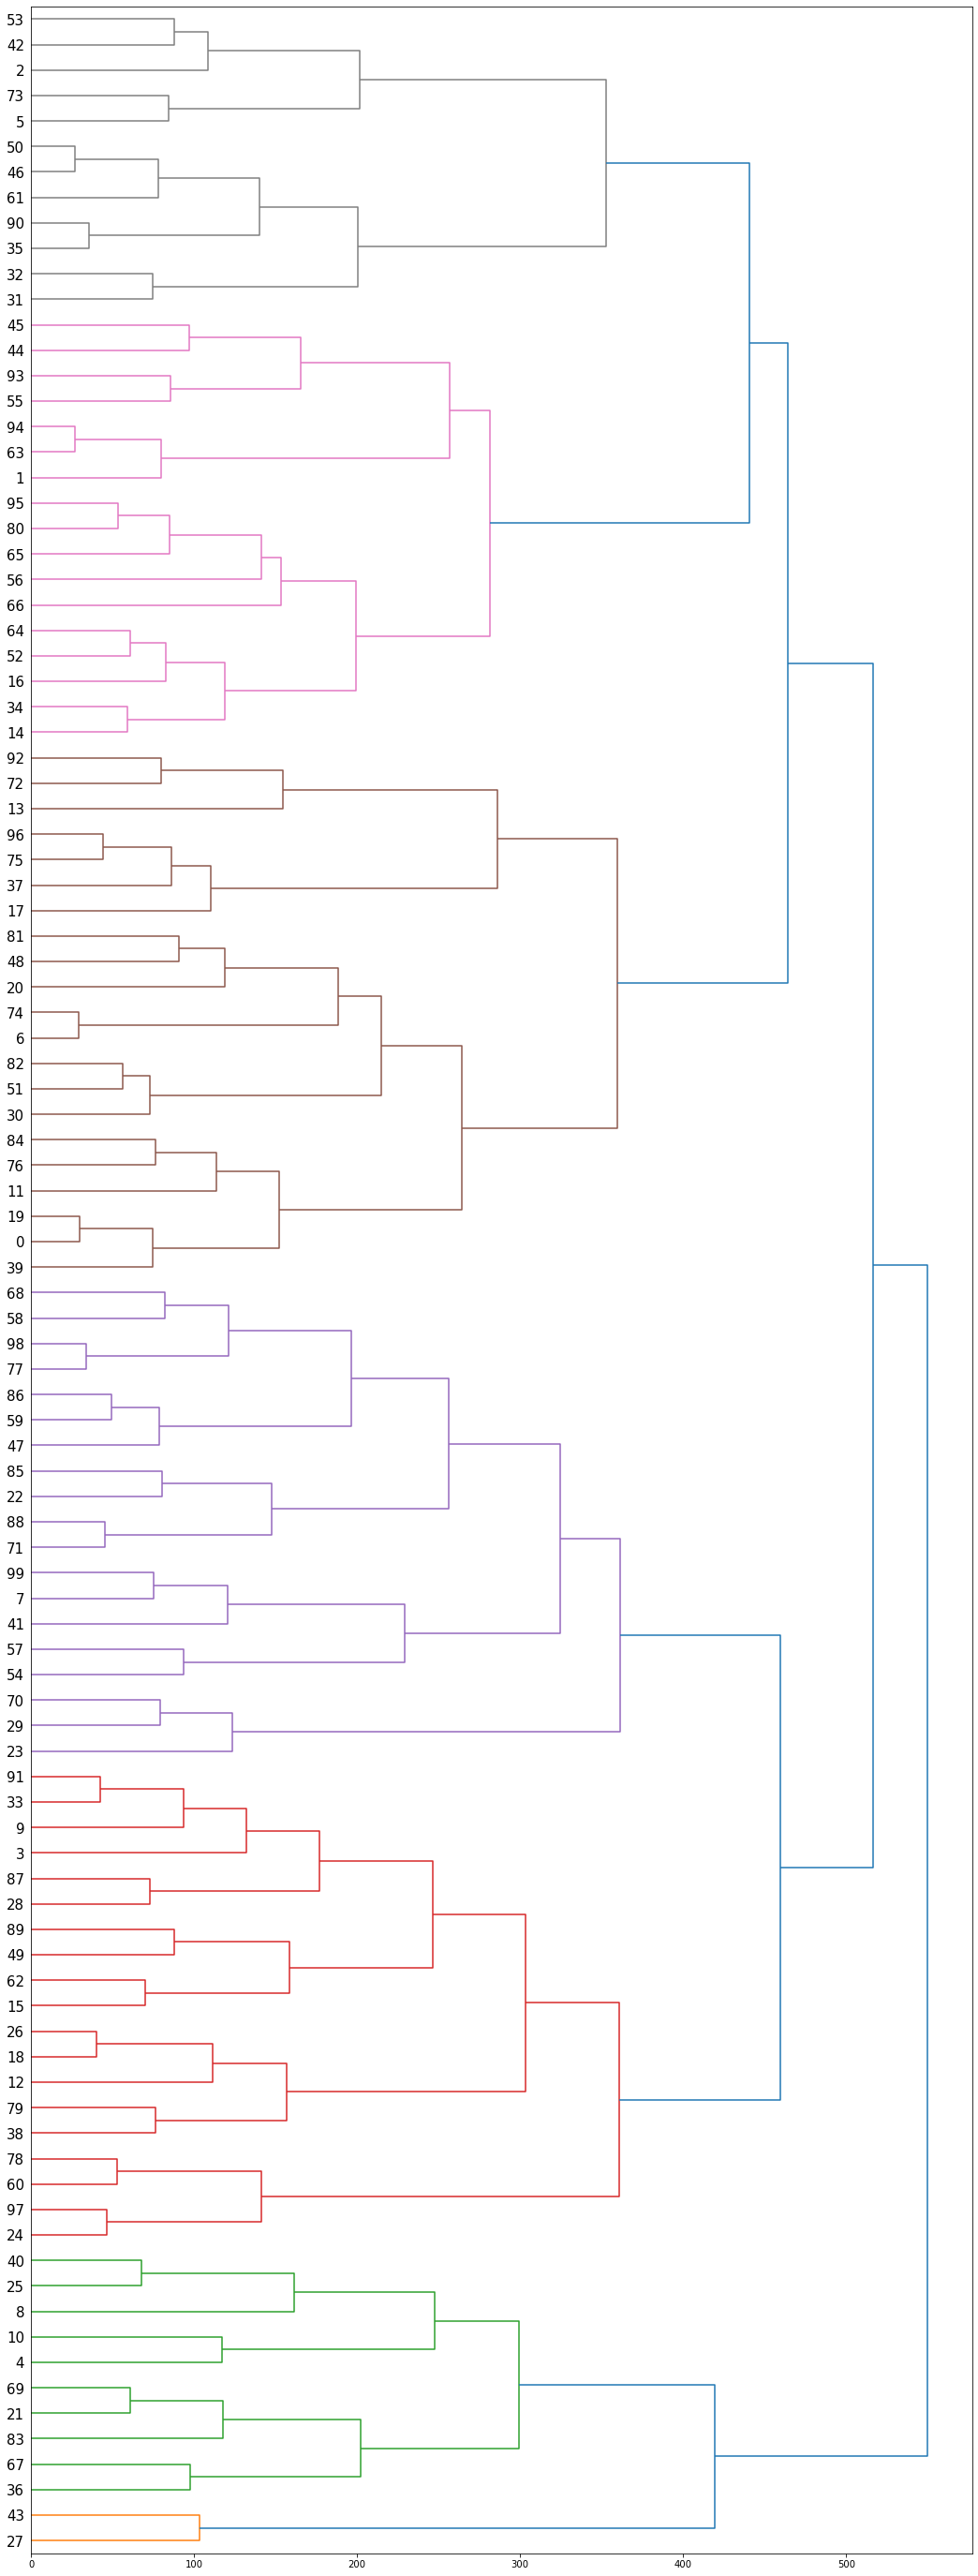

In [54]:
plt.figure(figsize=(18, 50))
cluster_dendrograms = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=15, orientation='right')